In [20]:
#collect turner's image for wikiart
from lxml import html
from bs4 import BeautifulSoup
import csv
import requests
page = requests.get('https://www.wikiart.org/en/william-turner/all-works/text-list')
page_data = BeautifulSoup(page.text,"lxml")


names = page_data.find_all("li",attrs={"class":"painting-list-text-row"})
names_list=[]
name_list=[]
year_list=[]
for h in names:
      
                name_list.append(h.find("a").contents[0])
                names_list.append(h.find("a").contents[0].lower().replace(" ", "-").replace(",","-").replace("\xa0","-").replace('(',"").replace(")","").replace(".","").replace("'","-").replace("`","-").replace(";","").replace("?","").replace("’","-"))
                year_list.append(h.find("span").contents[0].replace(",","").replace(" ","")) 

In [21]:
for i in range(len(names_list)):
    names_list[i]=names_list[i].replace("---","-")

In [25]:
for i in range(len(names_list)):
    names_list[i]=names_list[i].replace("!","")

In [22]:
for i in range(len(names_list)):
    names_list[i]=names_list[i].replace("--","-")

In [24]:
for i in range(len(names_list)):
    if names_list[i][-1]=="-":
         names_list[i][-1].replace("-","")

In [23]:
for i in range(len(names_list)):
    if names_list[i][-1]=="?":
         names_list[i][-1].replace("?","")

In [26]:
for i in range(len(names_list)):
        title="../turner_image/{}.jpg".format(names_list[i])
        url= "https://uploads0.wikiart.org/images/william-turner/{}.jpg!Large.jpg".format(names_list[i])
        im=requests.get(url,stream = True)
        if im.status_code != 404:
            f = open(title, 'wb')
            f.write(im.content)
            f.close()
        else:
            namess=names_list[i]+"-"+year_list[i]
            url2= "https://uploads0.wikiart.org/images/william-turner/{}.jpg!Large.jpg".format(namess)
            im2=requests.get(url2,stream = True)
            if im2.status_code != 404:
                    f = open(title, 'wb')
                    f.write(im2.content)
                    f.close()
            else:
                    namesss=names_list[i]+"-"+"(1)"
                    url3= "https://uploads0.wikiart.org/images/william-turner/{}.jpg!Large.jpg".format(namesss)
                    im3=requests.get(url3,stream = True)
                    if im3.status_code != 404:
                        f = open(title, 'wb')
                        f.write(im3.content)
                        f.close()
                    else:    
                        namessss=names_list[i]+"-"+year_list[i]+"(1)"
                        url4= "https://uploads0.wikiart.org/images/william-turner/{}.jpg!Large.jpg".format(namessss)
                        im4=requests.get(url4,stream = True)
                        if im4.status_code != 404:
                            f = open(title, 'wb')
                            f.write(im4.content)
                            f.close()
                        else: 
                            url5= "https://uploads0.wikiart.org/images/william-turner/{}.jpg".format(names_list[i])
                            im5=requests.get(url5,stream = True)
                            if im5.status_code != 404:
                                f = open(title, 'wb')
                                f.write(im5.content)
                                f.close()
                            else:   
                                print(namess)# print not download images' name 

self-portrait-1799
warkworth-castle-northumberland-thunderstorm-approaching-at-sunset-1799
ships-bearing-up-for-anchorage-the-egremont-sea-piece--1802
scarborough-town-and-castle-morningboys-catching-crabs-1811
the-decline-of-the-carthaginian-empire-1817
rievaulx-abbey-yorkshire-1825
view-from-the-terrace-of-a-villa-at-niton-isle-of-wight-1826
east-cowes-castle-the-seat-of-jnash-esq-the-regatta-beating-to-windward-1828
the-burning-of-the-houses-of-parliament-1834
the-burning-of-the-houses-of-parliament-1834
the-thames-above-waterloo-bridge-1835
the-bright-stone-of-honour-ehrenbreitstein-and-the-tomb-of-marceau-from-byron-s-childe-harold--1835
the-burning-of-the-houses-of-parliament-1835
shore-scene-with-waves-and-breakwater-1835
regulus-1837
sun-setting-over-a-lake-1840
ehrenbreitstein-and-coblenz-1840
snow-storm-steam-boat-off-a-harbour-s-mouth-1842
venice-?
view-of-saint-germain-en-laye-and-its-chateau-?


# Manually saved some not scraped images 

In [74]:
def get_img2(name):
    from PIL import Image
    img = Image.open(requests.get("https://uploads0.wikiart.org/images/william-turner/{}.jpg!Large.jpg".format(name), stream = True).raw)
    img.save('../turner_image/{}.jpg'.format(name))
    return img

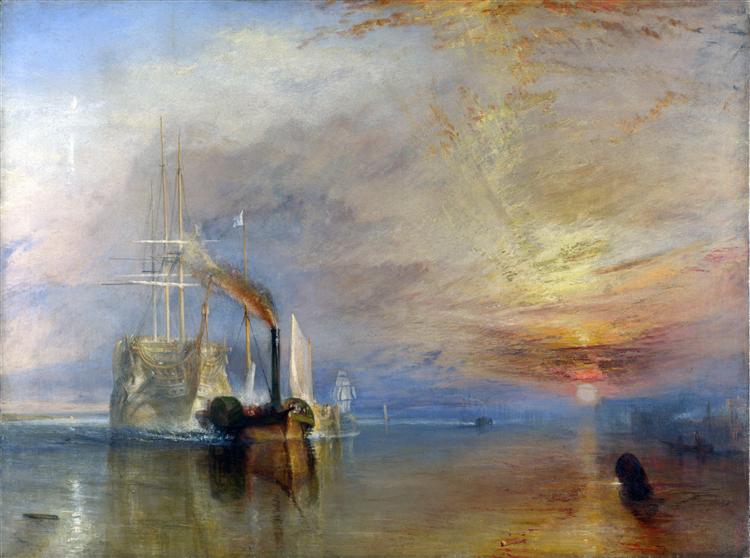

In [77]:
get_img2("the-fighting-temeraire-tugged-to-her-last-berth-to-be-broken-up-1839")